In [152]:
# !pip install imbalanced-learn
# !pip install seaborn

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Importation données


In [207]:
#importation des données
df_data = pd.read_csv('./data/train.csv', sep=';')

df_data['color'].value_counts()
# print(df_data)
# One-hot encoding
df_data = pd.get_dummies(df_data)
column_list = ['id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'color_red', 'color_white','quality']

good_columns = ['chlorides', 'volatile acidity', 'density', 'alcohol']
# column_names = {'0':'id', '1':'fixed acidity', '2':'volatile acidity', '3':'citric acid',
#        '4':'residual sugar', '5':'chlorides', '6':'free sulfur dioxide',
#        '7':'total sulfur dioxide', '8':'density', '9':'pH', '10':'sulphates', 'alcohol',
#        'color_red', 'color_white','quality'}
df_data = df_data[column_list]

# df_data = df_data[['chlorides', 'volatile acidity', 'density', 'alcohol', 'quality']]

print(df_data['quality'].value_counts())
print(len(df_data))


X = df_data.iloc[:, 0:df_data.shape[1]-1].values
y = df_data.iloc[:, df_data.shape[1]-1].values

print(len(X))
print(len(y))
df_data

6    1998
5    1500
7     739
4     154
8     133
3      21
9       2
Name: quality, dtype: int64
4547
4547
4547


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_red,color_white,quality
0,0,6.4,0.13,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,0,1,6
1,1,6.2,0.33,0.14,4.8,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,0,1,5
2,2,6.3,0.32,0.32,1.5,0.030,24.0,101.0,0.98923,3.21,0.42,13.0,0,1,5
3,3,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,0,1,6
4,4,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.5,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,4542,7.1,0.18,0.32,12.2,0.048,36.0,125.0,0.99670,2.92,0.54,9.4,0,1,6
4543,4543,7.9,0.26,0.33,10.3,0.039,73.0,212.0,0.99690,2.93,0.49,9.5,0,1,6
4544,4544,7.3,0.22,0.37,14.3,0.063,48.0,191.0,0.99780,2.89,0.38,9.0,0,1,6
4545,4545,7.2,0.51,0.24,10.0,0.093,35.0,197.0,0.99810,3.41,0.47,9.0,0,1,5


# Traitement des données

## Imbalanced Dataset

In [208]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X,y)
X_resampled, y_resampled = ros.fit_resample(X,y)


dfXx = pd.DataFrame(data=X_resampled)
dfy['quality'] = pd.DataFrame(data=y_resampled)



## Feature Selection

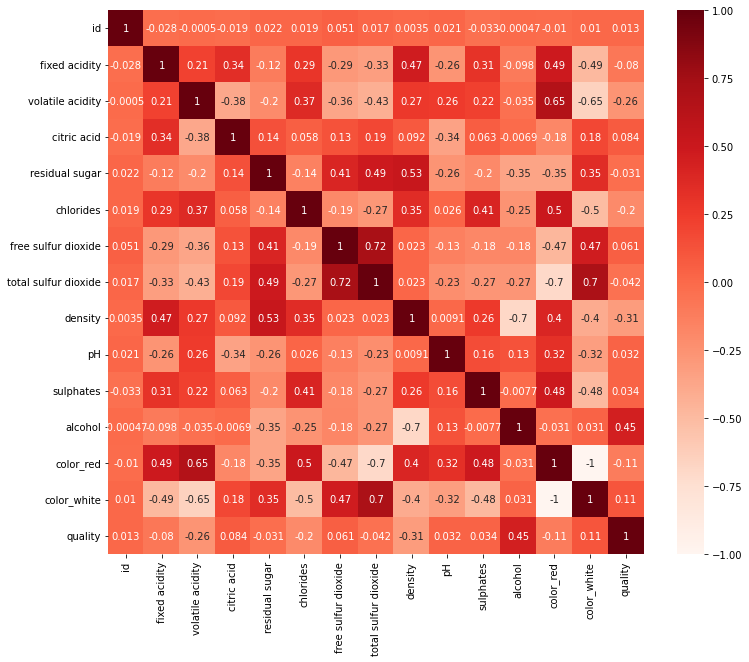

id                      0.012960
residual sugar          0.031239
pH                      0.032368
sulphates               0.034438
total sulfur dioxide    0.041837
free sulfur dioxide     0.060798
fixed acidity           0.080260
citric acid             0.083584
color_white             0.111778
color_red               0.111778
chlorides               0.196164
volatile acidity        0.262429
density                 0.306301
alcohol                 0.445358
quality                 1.000000
Name: quality, dtype: float64

In [170]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["quality"])
cor_target.sort_values()
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.10]
# relevant_features


# RandomForestRegressor

In [209]:

# import Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, label_train, label_test = train_test_split(dfXx,dfy, test_size=0.2, random_state=0)

# #Feature Scaling... pt pas necessaire 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)



In [210]:
#Entrainement du model de regression
#create regressor object
model = RandomForestRegressor(n_estimators=1000, random_state=0)
model.fit(X_train, label_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [12]:
#predictions

# label_pred = model.predict(X_test)
# # label_pred.round()

In [126]:
# from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, label_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(label_test, label_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, label_pred)))
# # label_pred

In [219]:
x_public = pd.read_csv('./data/test_public.csv', sep=';')
# x_public = x_public[good_columns]
x_public
x_public = pd.get_dummies(x_public)
# x_public
label_pred = model.predict(x_public.values)
print(len(label_pred))
label_pred = label_pred[:,1]
label_pred = [int(a) for a in label_pred]
type(label_pred[0])
print(label_pred)

975
[6, 7, 5, 6, 6, 5, 5, 6, 8, 5, 6, 5, 6, 4, 6, 6, 5, 6, 6, 7, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 4, 5, 6, 5, 6, 4, 6, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 7, 5, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 6, 4, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 4, 5, 5, 6, 6, 7, 5, 6, 5, 5, 4, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 4, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 6, 5, 4, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 4, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 6, 6, 5, 4, 6, 5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 5, 6, 4, 6, 5, 7, 6, 7, 6, 5, 5, 6, 5, 5, 4, 5, 5, 5, 7, 7, 5, 5, 5, 6, 5, 4, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 4, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 4, 6, 6, 6, 5, 5, 6, 6, 4, 5, 6, 6, 6, 5, 5, 5, 5, 5, 7, 7, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 4, 5, 5, 5,

In [220]:
# list of name, degree, score 
id_list = np.arange((len(label_pred)))
print(len(id_list), len(label_pred))
# dictionary of lists  
dict = {'id': id_list, 'quality': label_pred}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('./data/submission_rf.csv', index=False) 

975 975
